# Facial landmarks
https://www.pyimagesearch.com/2017/04/03/facial-landmarks-dlib-opencv-python/

In [1]:
from imutils import face_utils
import numpy as np
import argparse
import imutils
import dlib
import cv2
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 20

## Generic functions

In [2]:
def rect_to_bb(rect):
    # Take a bounding predicted by dlib and convert it to the format (x, y, w, h)
    # as we would normally do with OpenCV
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y
    
    # Return a tuple of (x, y, w, h)
    return (x, y, w, h)


def shape_to_np(shape, dtype="int"):
    # Initialize the list of (x, y)-coordinates
    coords = np.zeros((68, 2), dtype=dtype)
    
    # Loop over the 68 facial landmarks and convert them to a 2-tuple of (x, y)-coordinates
    for i in range(0, 68):
        coords[i] = (shape.part(i).x, shape.part(i).y)
    
    # Return the list of (x, y)-coordinates
    return coords

## Configuration

In [3]:
image_path = 'images/example_03.jpg'
shape_predictor = 'shape_predictor_68_face_landmarks.dat'  # Path to dlib’s pre-trained facial landmark detector
pyramid_levels = 1  # It can help detect more faces although it's more computationally costly

## Initialization

In [4]:
# Initialize dlib's face detector (HOG-based) and then create the facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(shape_predictor)

## Detect facial landmarks

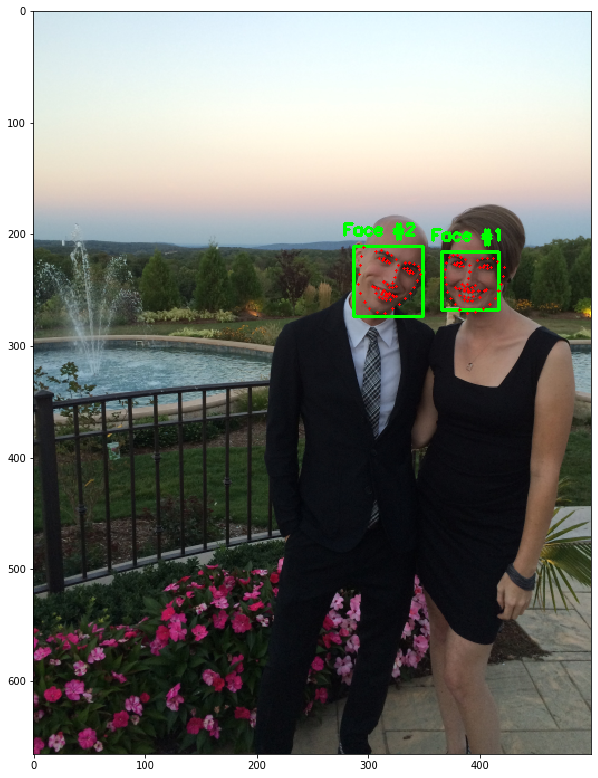

In [5]:
# Load the input image, resize it, and convert it to grayscale
image = cv2.imread(image_path)
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the grayscale image

rects = detector(gray, pyramid_levels)

# Loop over the face detections
for (i, rect) in enumerate(rects):
    # Determine the facial landmarks for the face region, then convert the facial
    # landmark (x, y)-coordinates to a NumPy array
    shape = predictor(gray, rect)
    shape = shape_to_np(shape)
    
    # Convert dlib's rectangle to a OpenCV-style bounding box
    # [i.e., (x, y, w, h)], then draw the face bounding box
    (x, y, w, h) = rect_to_bb(rect)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    # Show the face number
    cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
    # Loop over the (x, y)-coordinates for the facial landmarks and draw them on the image
    for (x, y) in shape:
        cv2.circle(image, (x, y), 1, (0, 0, 255), -1)

# Show the output image with the face detections + facial landmarks
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)